In [ ]:
import pandas as pd
df = pd.read_csv('df.csv')
dftopic = pd.read_csv('topic_df6.csv')

In [ ]:

merged_df = df.merge(dftopic, left_index=True, right_index=True, how='inner')

Data Source

In [ ]:
data_official_web = 14235
data_amazon = 13350
data_wayfair = 23640

In [ ]:
all_data = data_official_web + data_amazon + data_wayfair
all_clean = 35240
removed = all_data - all_clean

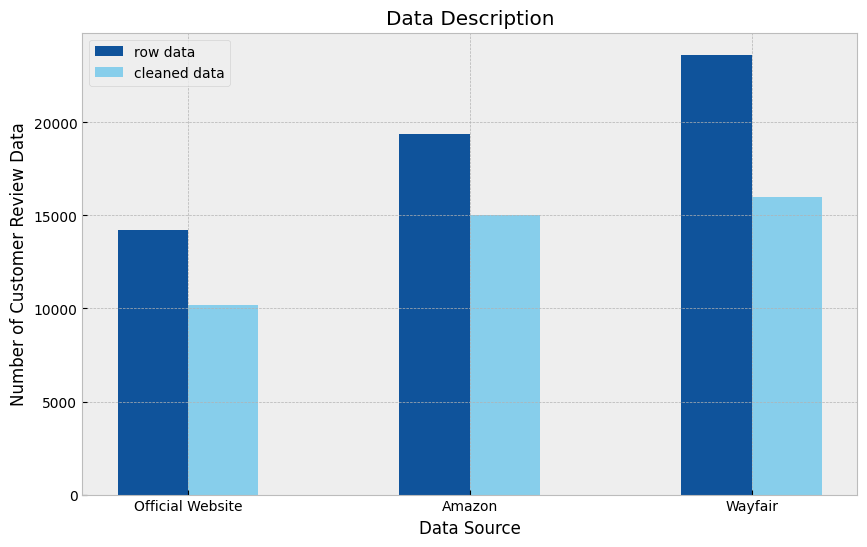

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Data for plotting
categories = ['Official Website', 'Amazon', 'Wayfair']
values1 = [data_official_web, data_amazon, data_wayfair]
x = np.arange(len(categories))
width = 0.25
values2 = [data_official_web - 4034, data_amazon - 4321, data_wayfair - 7630]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, values1, width, color='#0F539B',label = 'row data')
plt.bar(x + width/2, values2, width, color='skyblue',label = 'cleaned data')

# Adding title and labels
plt.title('Data Description')
plt.xticks(x, labels = categories)
plt.xlabel('Data Source')
plt.ylabel('Number of Customer Review Data')
plt.legend()

# Show the plot
plt.show()


ValueError: too many values to unpack (expected 2)

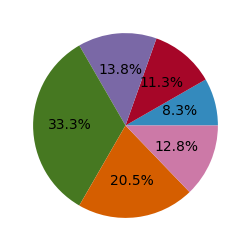

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import ConnectionPatch

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = [.27, .56, .17]
labels = ['Approve', 'Disapprove', 'Undecided']
explode = [0.1, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * overall_ratios[0]
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode)

# bar chart parameters
age_ratios = [.33, .54, .07, .06]
age_labels = ['Under 35', '35-49', '50-65', 'Over 65']
bottom = 1
width = .2

# Adding from the top matches the legend.
for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('Age of approvers')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[0].theta1, wedges[0].theta2
center, r = wedges[0].center, wedges[0].r
bar_height = sum(age_ratios)

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35240 entries, 0 to 35239
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0.2                35240 non-null  int64  
 1   Unnamed: 0.1                35240 non-null  int64  
 2   Unnamed: 0_x                35240 non-null  int64  
 3   Review Date                 35240 non-null  object 
 4   rating                      5114 non-null   float64
 5   Product                     21580 non-null  object 
 6   Review                      35239 non-null  object 
 7   country                     32117 non-null  object 
 8   Price                       19146 non-null  float64
 9   pre_wordnet                 35190 non-null  object 
 10  rev_word_count              35240 non-null  int64  
 11  unique_word_count           35240 non-null  int64  
 12  Rate                        35240 non-null  object 
 13  rating_predict              352

In [ ]:
merged_df['Topic'].unique()

array([-1,  6,  2, 16, 11,  1, 22,  9,  3, 32, 30, 25,  4, 26, 13, 42,  5,
       23, 18, 17,  7, 12, 31, 29, 15, 28,  8,  0, 14, 19, 20, 40, 35, 41,
       44, 48, 10, 21, 46, 38, 24, 34, 27, 39, 33, 36, 47, 43, 37, 45])

In [ ]:
merged_df['Topic'].replace(18, 5, inplace=True)
merged_df['Topic'].replace(25, 14, inplace=True)



1. **-1_support_comfortable_hour_lumbar**: "Lumbar Support and Comfort Over Hours"
2. **6_customer_service_customer_service_company**: "Customer Service and Company Interaction"
3. **2_support_lumbar_adjustable_mesh**: "Adjustable Lumbar Support and Mesh Design"
4. **16_cylinder_part_replacement_warranty**: "Cylinder Parts and Replacement Warranty"
5. **11_desk_height_assemble_table**: "Assembly Ease and Desk Height Compatibility"
6. **1_lumbar_support_sit_comfortable**: "Lumbar Support Comfort"
7. **22_comfortable_assemble_sturdy_ajustments**: "Comfort, Sturdiness, and Adjustment Ease"
8. **9_cushion_pillow_head_rest_support**: "Cushioning and Headrest Support"
9. **3_height_size_comfortable_petite**: "Comfort for Petite Sizes and Height Adjustment"
10. **32_mesh_breathable_material_fabric**: "Breathable Mesh Material"
11. **30_sale_range_value_dollar**: "Sale Range and Value for Money"
12. **25_bolt_instruction_wrench_assembly**: "Assembly Instructions and Tools"
13. **4_wheel_caster_carpet_roller**: "Wheel and Caster Performance on Carpets"
14. **26_leather_fabric_quality_color**: "Leather Quality, Fabric, and Color Options"
15. **13_adjustment_lever_adjustability_comfortable**: "Lever Adjustments and Comfort"
16. **42_assemble_comfortable_aspect_quality**: "Assembly, Comfort, and Quality Aspects"
17. **5_home_comfortable_assemble_quality**: "Home Chair Comfort and Quality"
18. **23_gaming_session_edition_comfortable**: "Gaming Edition Comfort"
19. **18_hour_comfortable_desk_use**: "Comfort for Long Desk Hours"
20. **17_quality_comfortable_assemble_sturdiness**: "Quality, Comfort, Assembly, and Sturdiness"
21. **7_quality_material_value_sturdy**: "Material Quality and Sturdiness"
22. **12_month_hour_comfortable_assemble**: "Monthly Comfort and Assembly"
23. **31_aeron_jessica_mirra_redesign**: "Aeron and Mirra Chair Redesigns"
24. **29_packaging_delivery_damage_assemble**: "Packaging, Delivery, and Damage Issues"
25. **15_super_comfy_comfort_comfy_comfortablevery**: "Superior Comfort and Comfiness"
26. **28_star_give_star_reason_star_love**: "Star Ratings and Reasons for Love"
27. **8_adjustable_comfortable_armrest_assemble**: "Adjustable Armrests and Comfort"
28. **0_comfortable_assemble_sturdy_stylish**: "Comfort, Style, and Sturdiness"
29. **14_assembly_instruction_assembly_instruction_assemble**: "Assembly Instructions and Process"
30. **19_tilt_recline_lock_function**: "Tilt, Recline, and Lock Features"
31. **20_squeak_squeaky_month_sound**: "Squeakiness and Noise Issues"
32. **40_arm_comfortable_personal_wheel**: "Arm Comfort and Personalization"
33. **35_size_perfect_size_chart_comfortable**: "Size Fit and Comfort"
34. **41_reviewer_consumer_report_read_assemble**: "Consumer Reviews and Reports"
35. **44_investment_worth_investment_investmentthe_notice**: "Investment Worth and Noticeability"
36. **48_posture_slouch_healthy_comfortable**: "Posture Support and Health"
37. **10_color_comfortable_blue_color_bright**: "Color Options and Comfort"
38. **21_gift_christmas_christmas_gift_christmas_present**: "Ideal as Christmas Gifts"
39. **46_perfection_glove_fitgreat_comfortable**: "Perfect Fit and Comfort"
40. **38_carpet_wheel_hardwood_floor_roller**: "Performance on Carpet and Hardwood"
41. **24_support_comfortable_assemble_recommend**: "Support, Comfort, and Recommendations"
42. **34_design_modern_sleek_superior**: "Modern and Sleek Design"
43. **27_comfortable_solution_flexible_work**: "Comfortable Solutions for Flexible Work"
44. **39_comfortable_long_duration_stretch_composer**: "Long Duration Comfort and Stretch"
45. **33_month_long_term_comfortable_daily**: "Long-term Daily Comfort"
46. **36_para_bien_armar_excelente**: "Excellent Assembly Experience" (Spanish)
47. **47_covid_pandemic_office_coronavirus**: "COVID Pandemic and Office Adaptations"
48. **43_school_virtual_college_student_online_class**: "Suitability for School and Online Classes"
49. **37_home_comfortable_chairgetting_pricework**: "Home Comfort and Price-to-Work Ratio"
50. **45_chaise_qualité_confortable_skin**: "Quality and Skin Comfort" (French)



In [ ]:
merged_df['Name'].unique()

array(['-1_support_comfortable_hour_lumbar',
       '6_customer_service_customer_service_company',
       '2_support_lumbar_adjustable_mesh',
       '16_cylinder_part_replacement_warranty',
       '11_desk_height_assemble_table',
       '1_lumbar_support_sit_comfortable',
       '22_comfortable_assemble_sturdy_ajustments',
       '9_cushion_pillow_head_rest_support',
       '3_height_size_comfortable_petite',
       '32_mesh_breathable_material_fabric', '30_sale_range_value_dollar',
       '25_bolt_instruction_wrench_assembly',
       '4_wheel_caster_carpet_roller', '26_leather_fabric_quality_color',
       '13_adjustment_lever_adjustability_comfortable',
       '42_assemble_comfortable_aspect_quality',
       '5_home_comfortable_assemble_quality',
       '23_gaming_session_edition_comfortable',
       '18_hour_comfortable_desk_use',
       '17_quality_comfortable_assemble_sturdiness',
       '7_quality_material_value_sturdy',
       '12_month_hour_comfortable_assemble',
       '31_aer

In [ ]:
name_mappings = {
    "-1_support_comfortable_hour_lumbar": "Lumbar Support and Comfort Over Hours",
    "6_customer_service_customer_service_company": "Customer Service and Company Interaction",
    "2_support_lumbar_adjustable_mesh": "Adjustable Lumbar Support and Mesh Design",
    "16_cylinder_part_replacement_warranty": "Cylinder Parts and Replacement Warranty",
    "11_desk_height_assemble_table": "Assembly Ease and Desk Height Compatibility",
    "1_lumbar_support_sit_comfortable": "Lumbar Support Comfort",
    "22_comfortable_assemble_sturdy_ajustments": "Comfort, Sturdiness, and Adjustment Ease",
    "9_cushion_pillow_head_rest_support": "Cushioning and Headrest Support",
    "3_height_size_comfortable_petite": "Comfort for Petite Sizes and Height Adjustment",
    "32_mesh_breathable_material_fabric": "Breathable Mesh Material",
    "30_sale_range_value_dollar": "Sale Range and Value for Money",
    "25_bolt_instruction_wrench_assembly": "Assembly Instructions and Tools",
    "4_wheel_caster_carpet_roller": "Wheel and Caster Performance on Carpets",
    "26_leather_fabric_quality_color": "Leather Quality, Fabric, and Color Options",
    "13_adjustment_lever_adjustability_comfortable": "Lever Adjustments and Comfort",
    "42_assemble_comfortable_aspect_quality": "Assembly, Comfort, and Quality Aspects",
    "5_home_comfortable_assemble_quality": "Home Chair Comfort and Quality",
    "23_gaming_session_edition_comfortable": "Gaming Edition Comfort",
    "18_hour_comfortable_desk_use": "Comfort for Long Desk Hours",
    "17_quality_comfortable_assemble_sturdiness": "Quality, Comfort, Assembly, and Sturdiness",
    "7_quality_material_value_sturdy": "Material Quality and Sturdiness",
    "12_month_hour_comfortable_assemble": "Monthly Comfort and Assembly",
    "31_aeron_jessica_mirra_redesign": "Aeron and Mirra Chair Redesigns",
    "29_packaging_delivery_damage_assemble": "Packaging, Delivery, and Damage Issues",
    "24_support_comfortable_assemble_recommend": "Support, Comfort, and Recommendations",
    "15_super_comfy_comfort_comfy_comfortablevery": "Superior Comfort and Comfiness",
    "28_star_give_star_reason_star_love": "Star Ratings and Reasons for Love",
    "8_adjustable_comfortable_armrest_assemble": "Adjustable Armrests and Comfort",
    "0_comfortable_assemble_sturdy_stylish": "Comfort, Style, and Sturdiness",
    "14_assembly_instruction_assembly_instruction_assemble": "Assembly Instructions and Process",
    "19_tilt_recline_lock_function": "Tilt, Recline, and Lock Features",
    "20_squeak_squeaky_month_sound": "Squeakiness and Noise Issues",
    "40_arm_comfortable_personal_wheel": "Arm Comfort and Personalization",
    "35_size_perfect_size_chart_comfortable": "Size Fit and Comfort",
    "41_reviewer_consumer_report_read_assemble": "Consumer Reviews and Reports",
    "44_investment_worth_investment_investmentthe_notice": "Investment Worth and Noticeability",
    "48_posture_slouch_healthy_comfortable": "Posture Support and Health",
    "10_color_comfortable_blue_color_bright": "Color Options and Comfort",
    "21_gift_christmas_christmas_gift_christmas_present": "Ideal as Christmas Gifts",
    "46_perfection_glove_fitgreat_comfortable": "Perfect Fit and Comfort",
    "38_carpet_wheel_hardwood_floor_roller": "Performance on Carpet and Hardwood",
    "27_comfortable_solution_flexible_work": "Comfortable Solutions for Flexible Work",
    "34_design_modern_sleek_superior": "Modern and Sleek Design",
    "39_comfortable_long_duration_stretch_composer": "Long Duration Comfort and Stretch",
    "33_month_long_term_comfortable_daily": "Long-term Daily Comfort",
    "36_para_bien_armar_excelente": "Excellent Assembly Experience",
    "47_covid_pandemic_office_coronavirus": "COVID Pandemic and Office Adaptations",
    "43_school_virtual_college_student_online_class": "Suitability for School and Online Classes",
    "37_home_comfortable_chairgetting_pricework": "Home Comfort and Price-to-Work Ratio",
    "45_chaise_qualité_confortable_skin": "Quality and Skin Comfort"
}
merged_df['Name'] = merged_df['Name'].map(name_mappings)




In [ ]:
merged_df['Bertopic_name'] = dftopic['Name']

In [ ]:
# Define the mapping dictionary
topic_mappings = {
    "Lumbar Support and Comfort Over Hours": "Lumbar Support and Comfort",
    "Lumbar Support Comfort": "Lumbar Support and Comfort",
    "Assembly Ease and Desk Height Compatibility": "Assembly and Instructions",
    "Assembly Instructions and Tools": "Assembly and Instructions",
    "Assembly Instructions and Process": "Assembly and Instructions",
    "Packaging, Delivery, and Damage Issues": "Assembly and Instructions",
    "Consumer Reviews and Reports": "Assembly and Instructions",
    "Material Quality and Sturdiness": "Material and Design Quality",
    "Quality, Comfort, Assembly, and Sturdiness": "Material and Design Quality",
    "Leather Quality, Fabric, and Color Options": "Material and Design Quality",
    "Modern and Sleek Design": "Material and Design Quality",
    "Comfort, Sturdiness, and Adjustment Ease": "Comfort and Adjustability",
    "Adjustable Armrests and Comfort": "Comfort and Adjustability",
    "Lever Adjustments and Comfort": "Comfort and Adjustability",
    "Comfort, Style, and Sturdiness": "Comfort and Adjustability",
    "Customer Service and Company Interaction": "Customer Service and Experience",
    "Support, Comfort, and Recommendations": "Customer Service and Experience",
    "Gaming Edition Comfort": "Use Case Specific Comfort",
    "Comfort for Long Desk Hours": "Use Case Specific Comfort",
    "Suitability for School and Online Classes": "Use Case Specific Comfort",
    "Home Comfort and Price-to-Work Ratio": "Use Case Specific Comfort",
    "Wheel and Caster Performance on Carpets": "Wheel and Surface Compatibility",
    "Performance on Carpet and Hardwood": "Wheel and Surface Compatibility",
    "Breathable Mesh Material": "Material and Design Quality",
    "Sale Range and Value for Money": "Customer Service and Experience",
    "Star Ratings and Reasons for Love": "Customer Service and Experience",
    "Perfect Fit and Comfort": "Comfort and Adjustability",
    "Investment Worth and Noticeability": "Material and Design Quality",
    "Posture Support and Health": "Comfort and Adjustability",
    "Ideal as Christmas Gifts": "Use Case Specific Comfort",
    "COVID Pandemic and Office Adaptations": "Use Case Specific Comfort",
    "Excellent Assembly Experience": "Assembly and Instructions", # Spanish
    "Quality and Skin Comfort": "Material and Design Quality" # French
}

merged_df['Merged_Topics'] = merged_df['Name'].map(topic_mappings).fillna(merged_df['Name'])




In [ ]:
merged_df['Merged_Topics'].unique()

array(['Lumbar Support and Comfort', 'Customer Service and Experience',
       nan, 'Assembly and Instructions', 'Comfort and Adjustability',
       'Material and Design Quality', 'Wheel and Surface Compatibility',
       'Use Case Specific Comfort'], dtype=object)



1. **Lumbar Support and Comfort**
   - **-1_support_comfortable_hour_lumbar** and **1_lumbar_support_sit_comfortable**
   - These topics both focus on lumbar support and overall comfort, making them good candidates for merging.

2. **Assembly and Instructions**
   - **11_desk_height_assemble_table**, **25_bolt_instruction_wrench_assembly**, **14_assembly_instruction_assembly_instruction_assemble**, **29_packaging_delivery_damage_assemble**, and **41_reviewer_consumer_report_read_assemble**
   - All these topics touch on aspects of assembly, instructions, and related customer service experiences.

3. **Material and Design Quality**
   - **7_quality_material_value_sturdy**, **17_quality_comfortable_assemble_sturdiness**, **26_leather_fabric_quality_color**, and **34_design_modern_sleek_superior**
   - These topics deal with the material quality, sturdiness, and overall design of the chairs.

4. **Comfort and Adjustability**
   - **22_comfortable_assemble_sturdy_ajustments**, **8_adjustable_comfortable_armrest_assemble**, **13_adjustment_lever_adjustability_comfortable**, and **0_comfortable_assemble_sturdy_stylish**
   - These topics focus on the comfort and adjustable features of the chairs.

5. **Customer Service and Experience**
   - **6_customer_service_customer_service_company** and **24_support_comfortable_assemble_recommend**
   - Both topics are related to customer service experiences and overall satisfaction.

6. **Use Case Specific Comfort**
   - **23_gaming_session_edition_comfortable**, **18_hour_comfortable_desk_use**, **43_school_virtual_college_student_online_class**, and **37_home_comfortable_chairgetting_pricework**
   - These topics are focused on the comfort of the chair in specific use cases (gaming, long desk use, school, and home).

7. **Wheel and Surface Compatibility**
   - **4_wheel_caster_carpet_roller** and **38_carpet_wheel_hardwood_floor_roller**
   - Both topics address the performance of chair wheels on different surfaces.


# *italicized text*![image.png](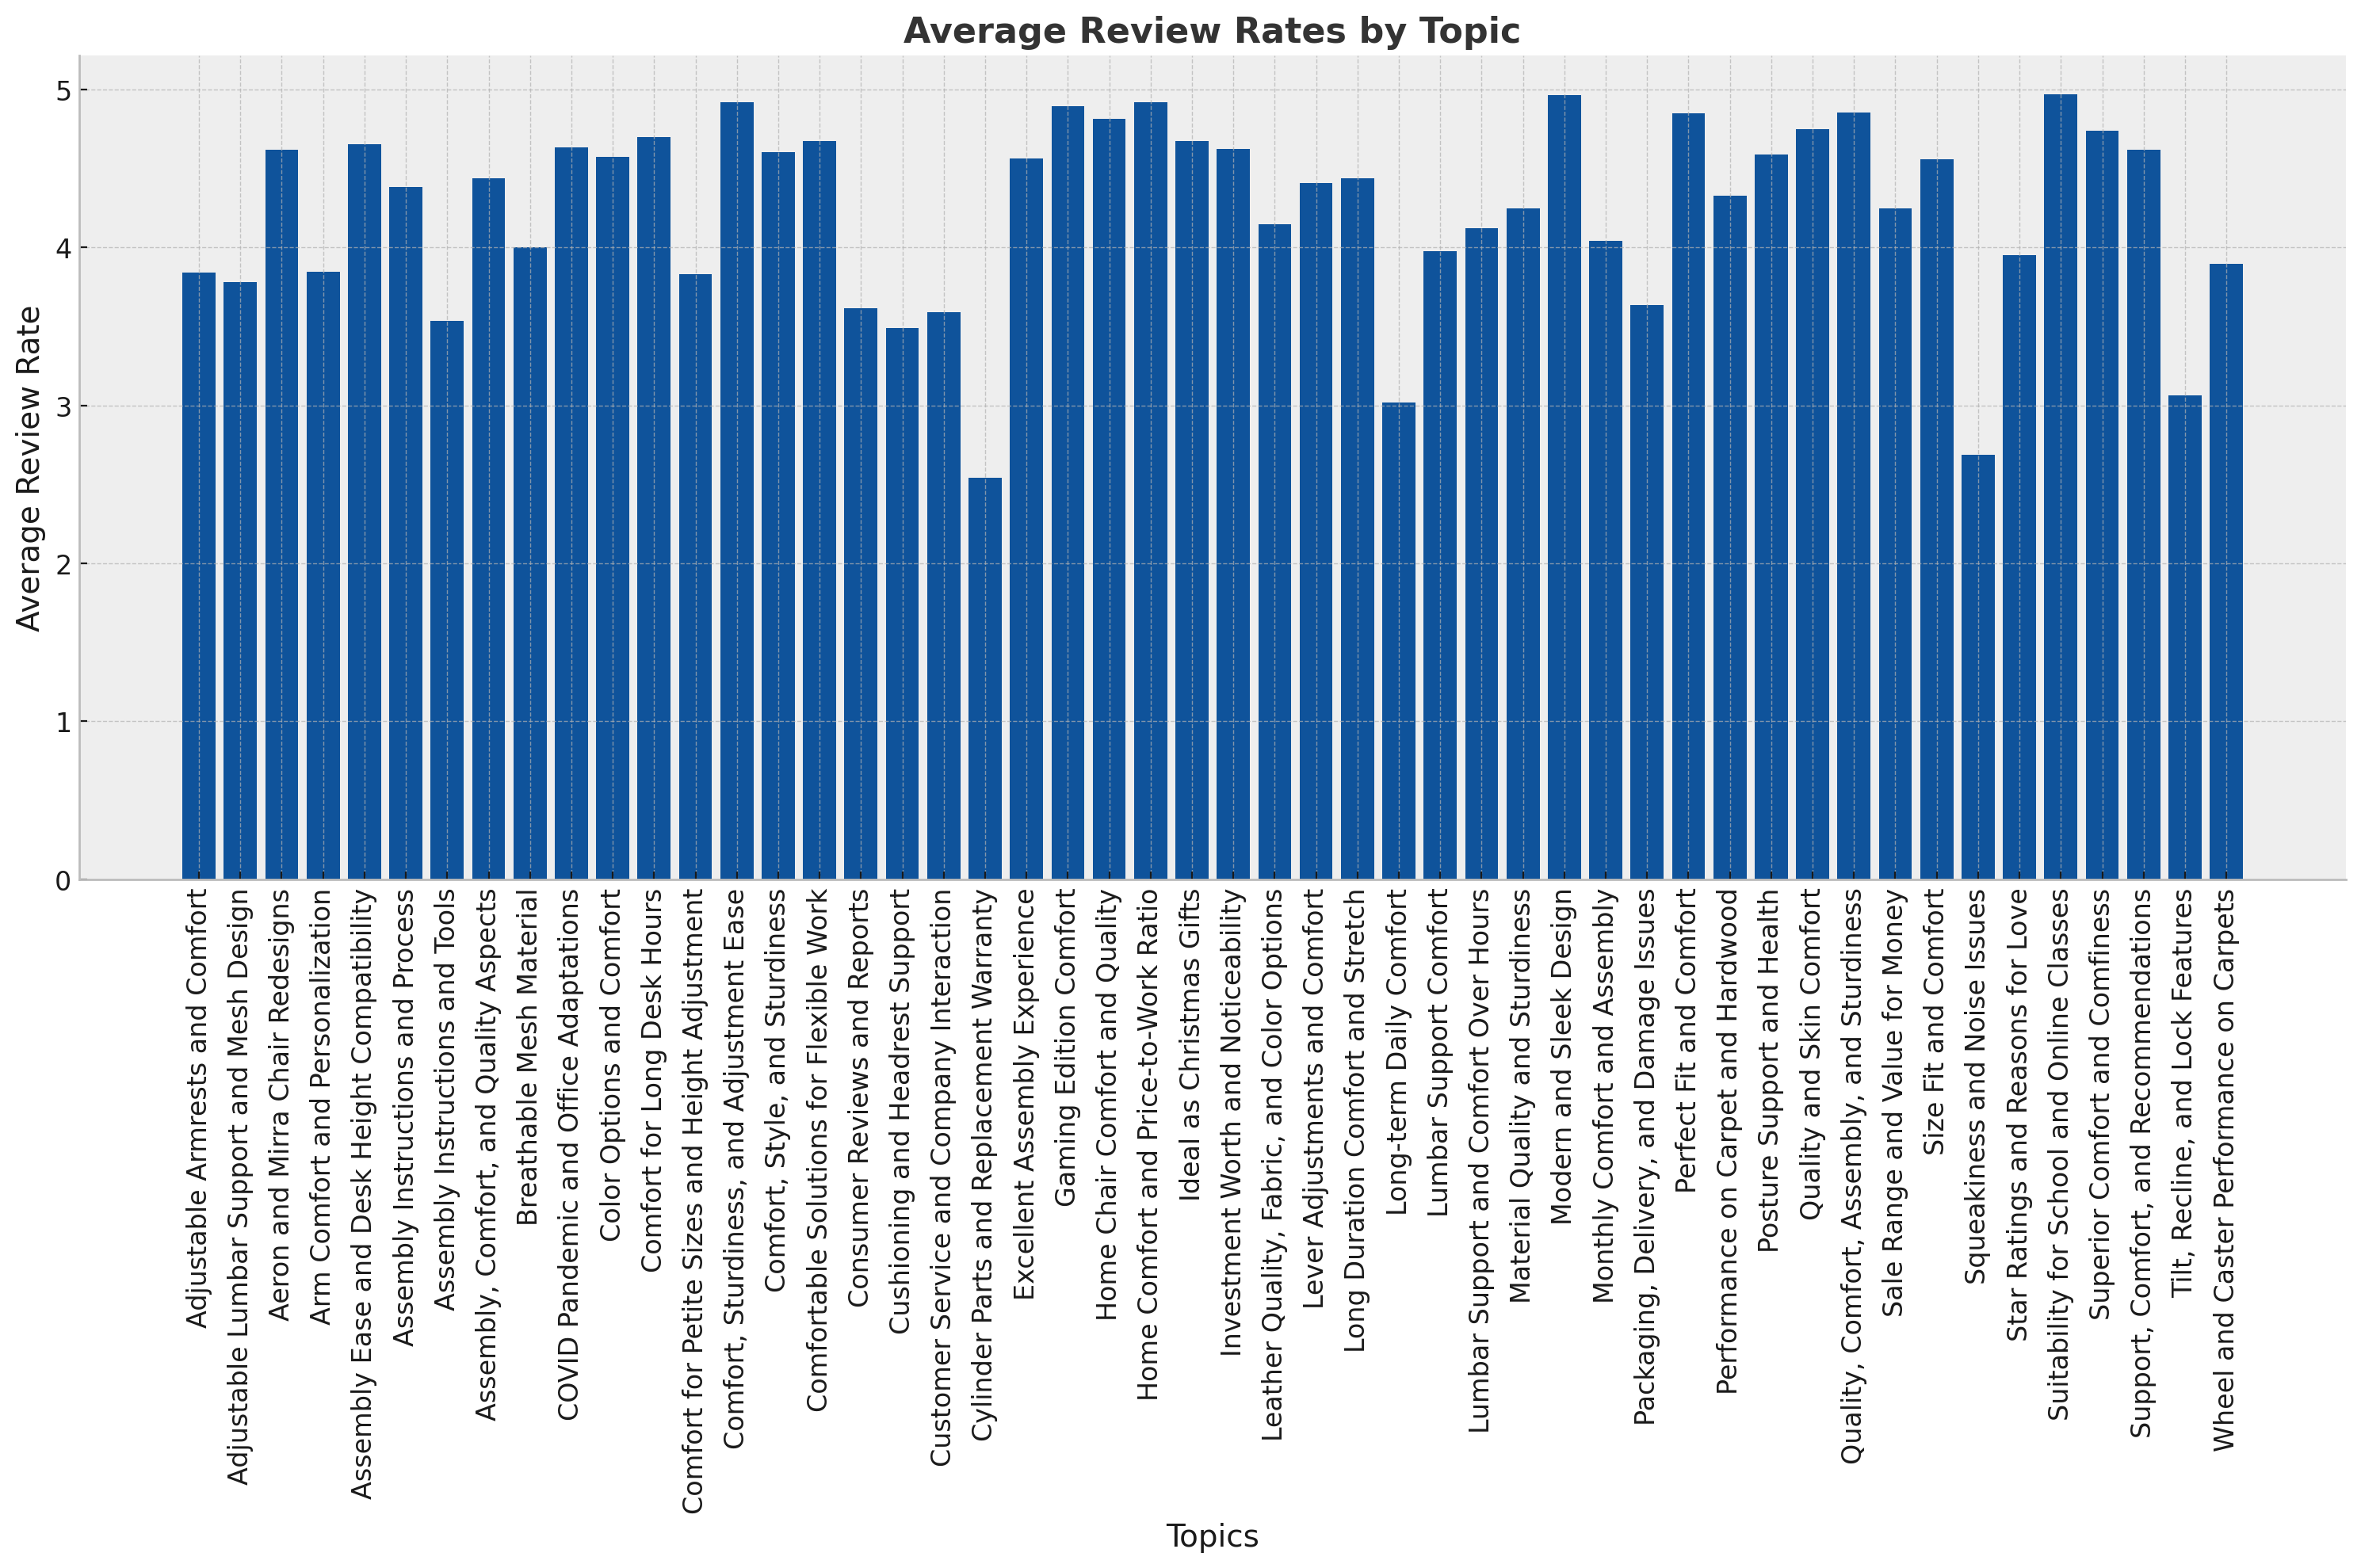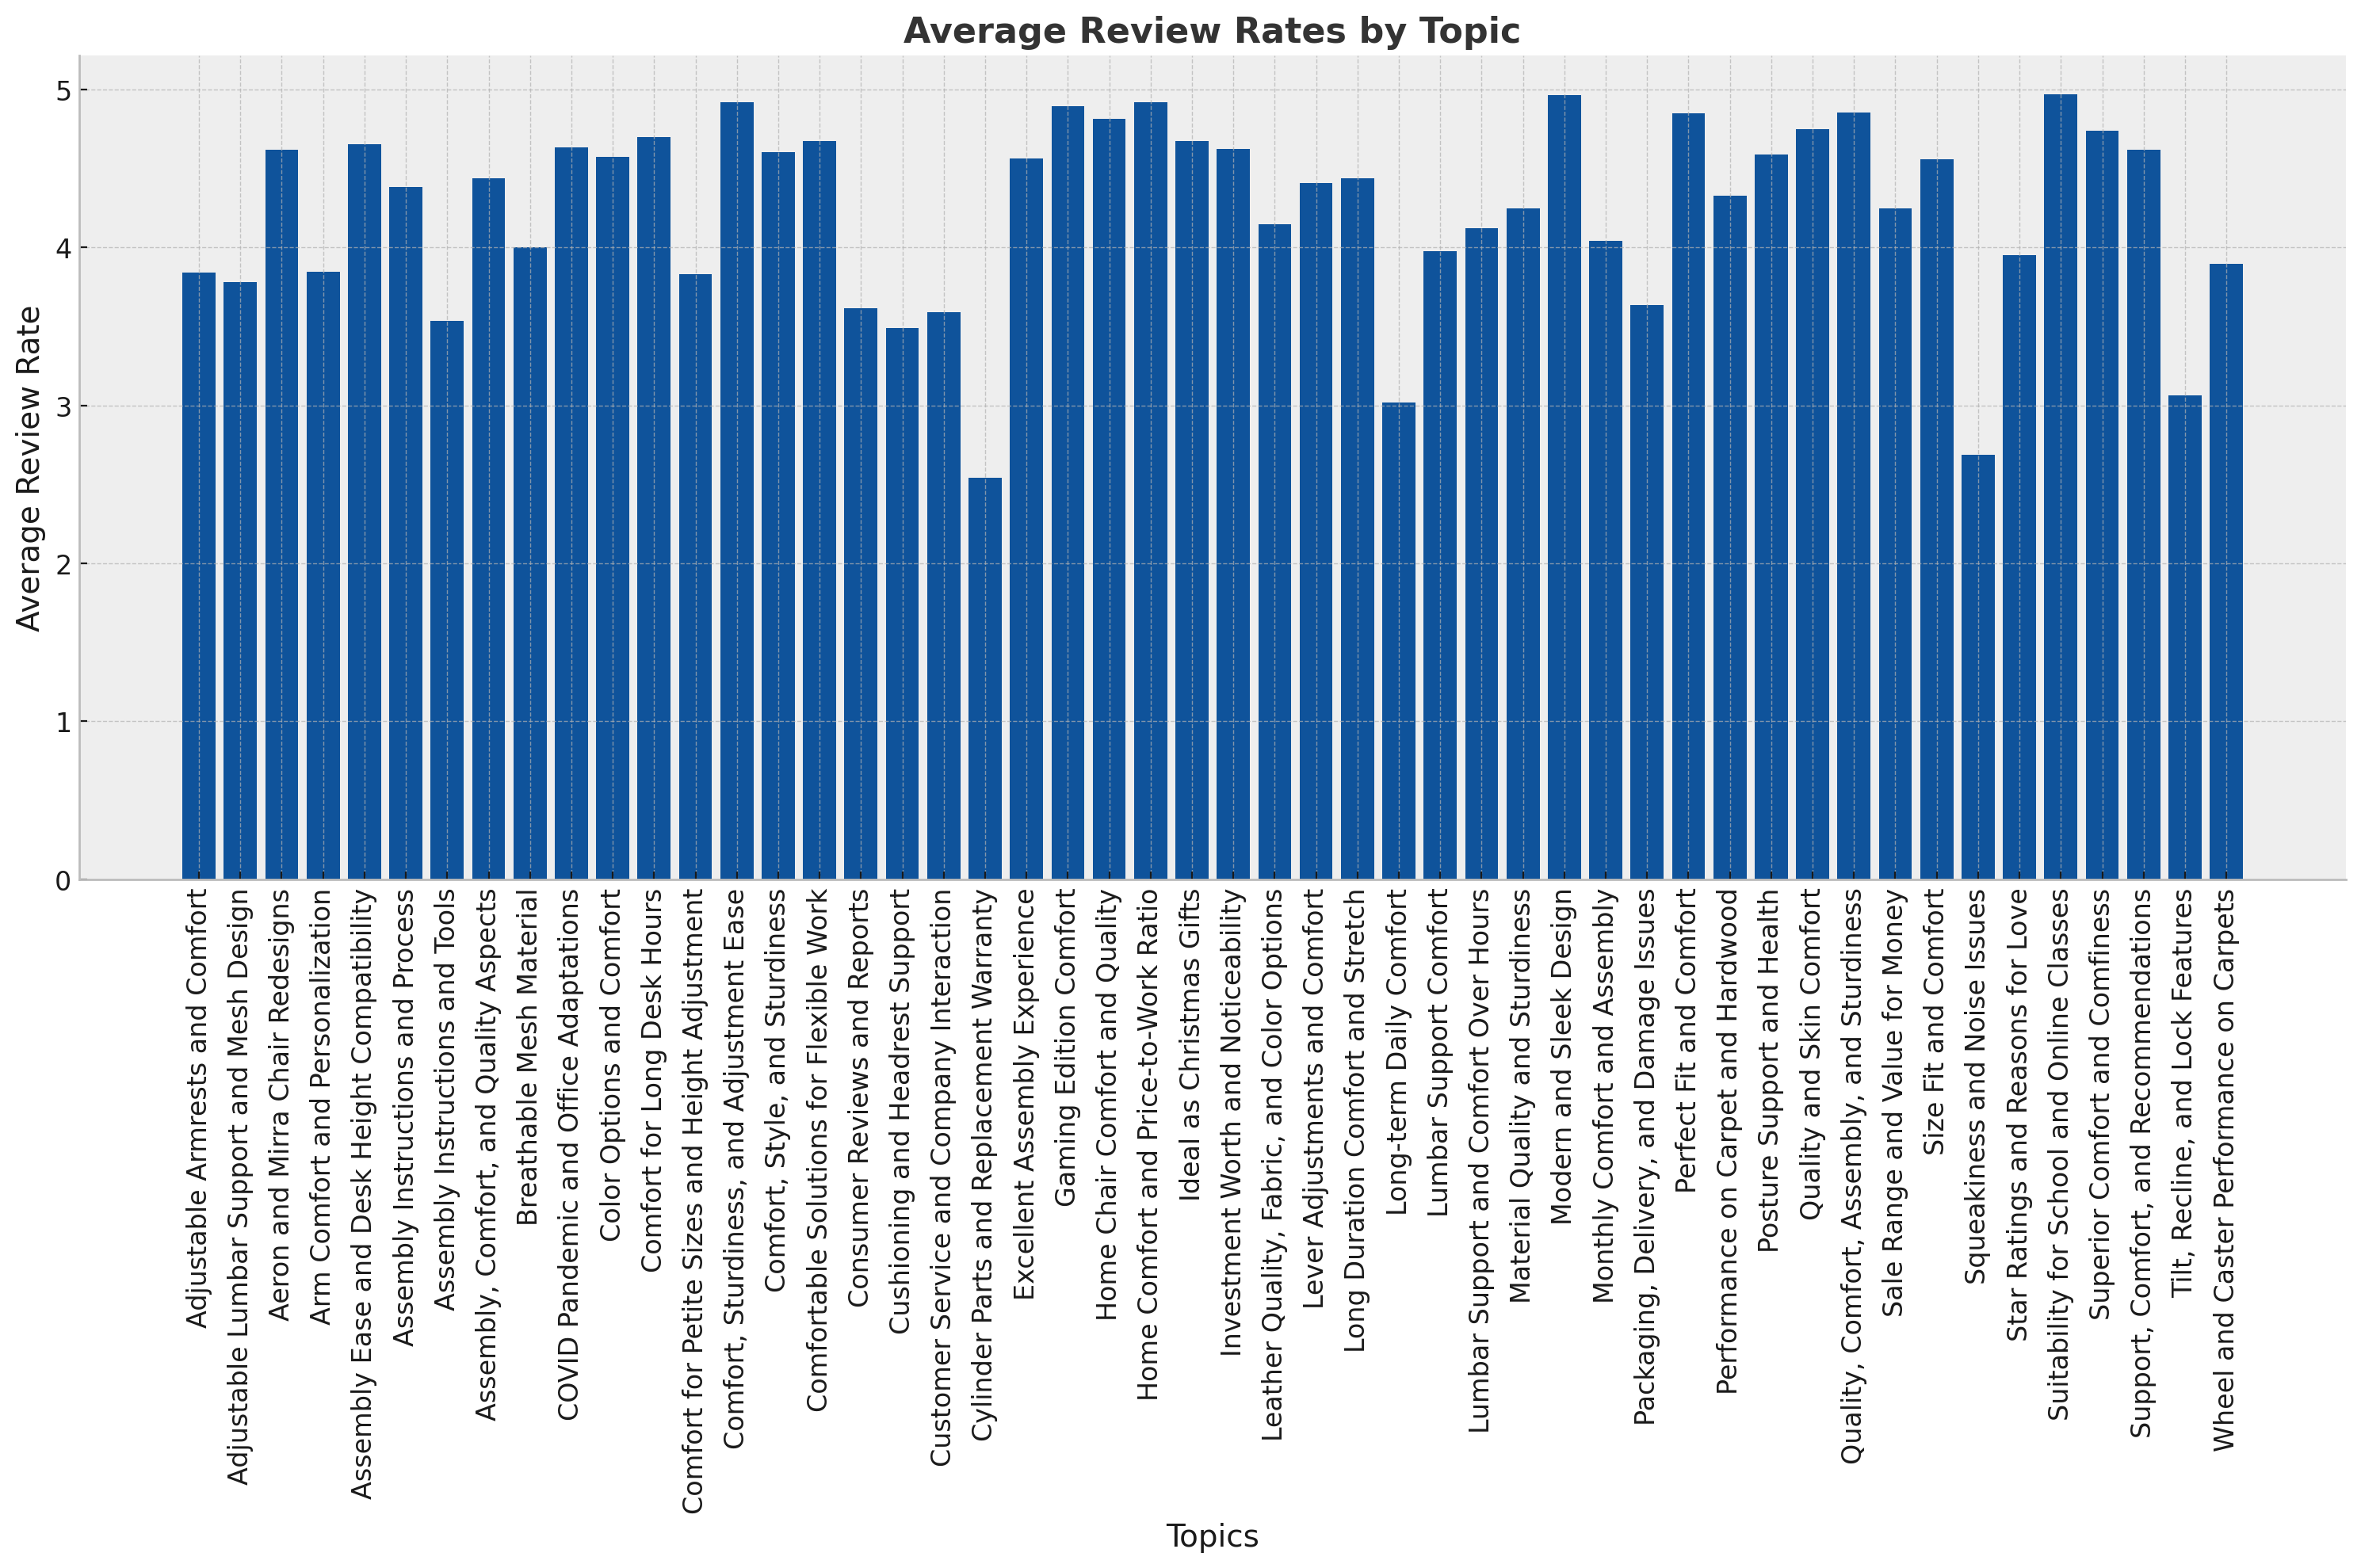)Output image

> Indented block




In [ ]:

from scipy import stats

# Assuming your DataFrame is named merged_df and the topic column is 'Merged_Topics'
# If you're using 'Name' or another column as your topic column, replace 'Merged_Topics' with that column name

# Calculate the average (mean) Review Rate for each topic
average_review_rate = merged_df.groupby('Name')['rating_predict'].mean()

# Calculate the mode (众数) Review Rate for each topic
# Since mode can return multiple values, we use a lambda function to handle this
mode_review_rate = merged_df.groupby('Name')['rating_predict'].agg(lambda x: stats.mode(x)[0])

# Print the results
print("Average Review Rate by Topic:")
print(average_review_rate)
print("\nMode Review Rate by Topic:")
print(mode_review_rate)


Average Review Rate by Topic:
Name
Adjustable Armrests and Comfort                   3.837838
Adjustable Lumbar Support and Mesh Design         3.781166
Aeron and Mirra Chair Redesigns                   4.616822
Arm Comfort and Personalization                   3.842857
Assembly Ease and Desk Height Compatibility       4.649891
Assembly Instructions and Process                 4.379310
Assembly Instructions and Tools                   3.536082
Assembly, Comfort, and Quality Aspects            4.437500
Breathable Mesh Material                          4.000000
COVID Pandemic and Office Adaptations             4.634615
Color Options and Comfort                         4.572614
Comfort for Long Desk Hours                       4.699301
Comfort for Petite Sizes and Height Adjustment    3.828750
Comfort, Sturdiness, and Adjustment Ease          4.920000
Comfort, Style, and Sturdiness                    4.600510
Comfortable Solutions for Flexible Work           4.673333
Consumer Reviews and 

In [ ]:
average_review_rate = merged_df.groupby('Merged_Topics')['rating_predict'].mean()

# Calculate the mode (众数) Review Rate for each topic
# Since mode can return multiple values, we use a lambda function to handle this
mode_review_rate = merged_df.groupby('Merged_Topics')['rating_predict'].agg(lambda x: stats.mode(x)[0])

# Print the results
print("Average Review Rate by Topic:")
print(average_review_rate)
print("\nMode Review Rate by Topic:")
print(mode_review_rate)

Average Review Rate by Topic:
Merged_Topics
Adjustable Lumbar Support and Mesh Design         3.781166
Aeron and Mirra Chair Redesigns                   4.616822
Arm Comfort and Personalization                   3.842857
Assembly and Instructions                         4.248074
Assembly, Comfort, and Quality Aspects            4.437500
Color Options and Comfort                         4.572614
Comfort and Adjustability                         4.525585
Comfort for Petite Sizes and Height Adjustment    3.828750
Comfortable Solutions for Flexible Work           4.673333
Cushioning and Headrest Support                   3.487136
Customer Service and Experience                   3.870289
Cylinder Parts and Replacement Warranty           2.540299
Home Chair Comfort and Quality                    4.810884
Long Duration Comfort and Stretch                 4.436620
Long-term Daily Comfort                           3.019802
Lumbar Support and Comfort                        4.108832
Material and

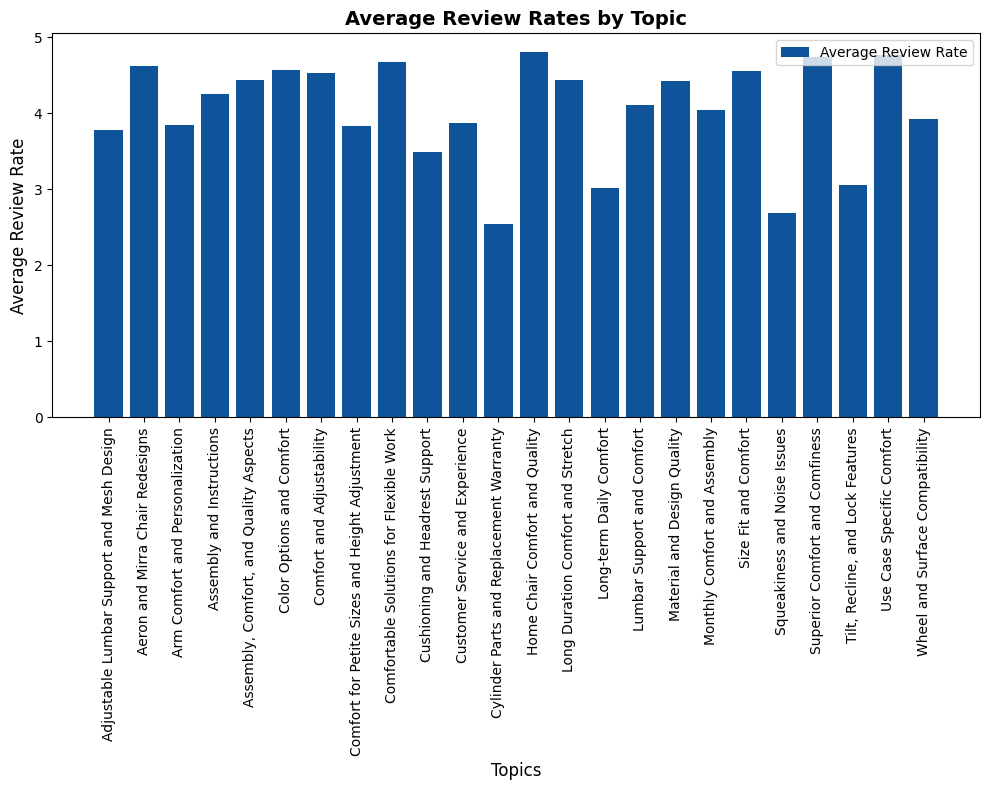

In [ ]:
import matplotlib.pyplot as plt

# Data for plotting
topics = [
    "Adjustable Lumbar Support and Mesh Design", "Aeron and Mirra Chair Redesigns",
    "Arm Comfort and Personalization", "Assembly and Instructions",
    "Assembly, Comfort, and Quality Aspects", "Color Options and Comfort",
    "Comfort and Adjustability", "Comfort for Petite Sizes and Height Adjustment",
    "Comfortable Solutions for Flexible Work", "Cushioning and Headrest Support",
    "Customer Service and Experience", "Cylinder Parts and Replacement Warranty",
    "Home Chair Comfort and Quality", "Long Duration Comfort and Stretch",
    "Long-term Daily Comfort", "Lumbar Support and Comfort",
    "Material and Design Quality", "Monthly Comfort and Assembly",
    "Size Fit and Comfort", "Squeakiness and Noise Issues",
    "Superior Comfort and Comfiness", "Tilt, Recline, and Lock Features",
    "Use Case Specific Comfort", "Wheel and Surface Compatibility"
]
review_rates = [
    3.781166, 4.616822, 3.842857, 4.248074, 4.437500, 4.572614,
    4.525585, 3.828750, 4.673333, 3.487136, 3.870289, 2.540299,
    4.810884, 4.436620, 3.019802, 4.108832, 4.421344, 4.042986,
    4.555556, 2.684729, 4.735135, 3.062500, 4.769850, 3.930506
]

# Plotting the bar chart
plt.figure(figsize=(10, 8))
bars = plt.bar(topics, review_rates, color='#0F539B')

# Adding title and labels
plt.title('Average Review Rates by Topic', fontsize=14, fontweight='bold')
plt.xlabel('Topics', fontsize=12)
plt.ylabel('Average Review Rate', fontsize=12)

# Rotating the x-axis labels for better visibility
plt.xticks(rotation=90)

# Adding the legend
plt.legend(['Average Review Rate'], loc='upper right')

# Making the style more business-like
plt.style.use('bmh')

# Show the plot
plt.tight_layout()
plt.show()


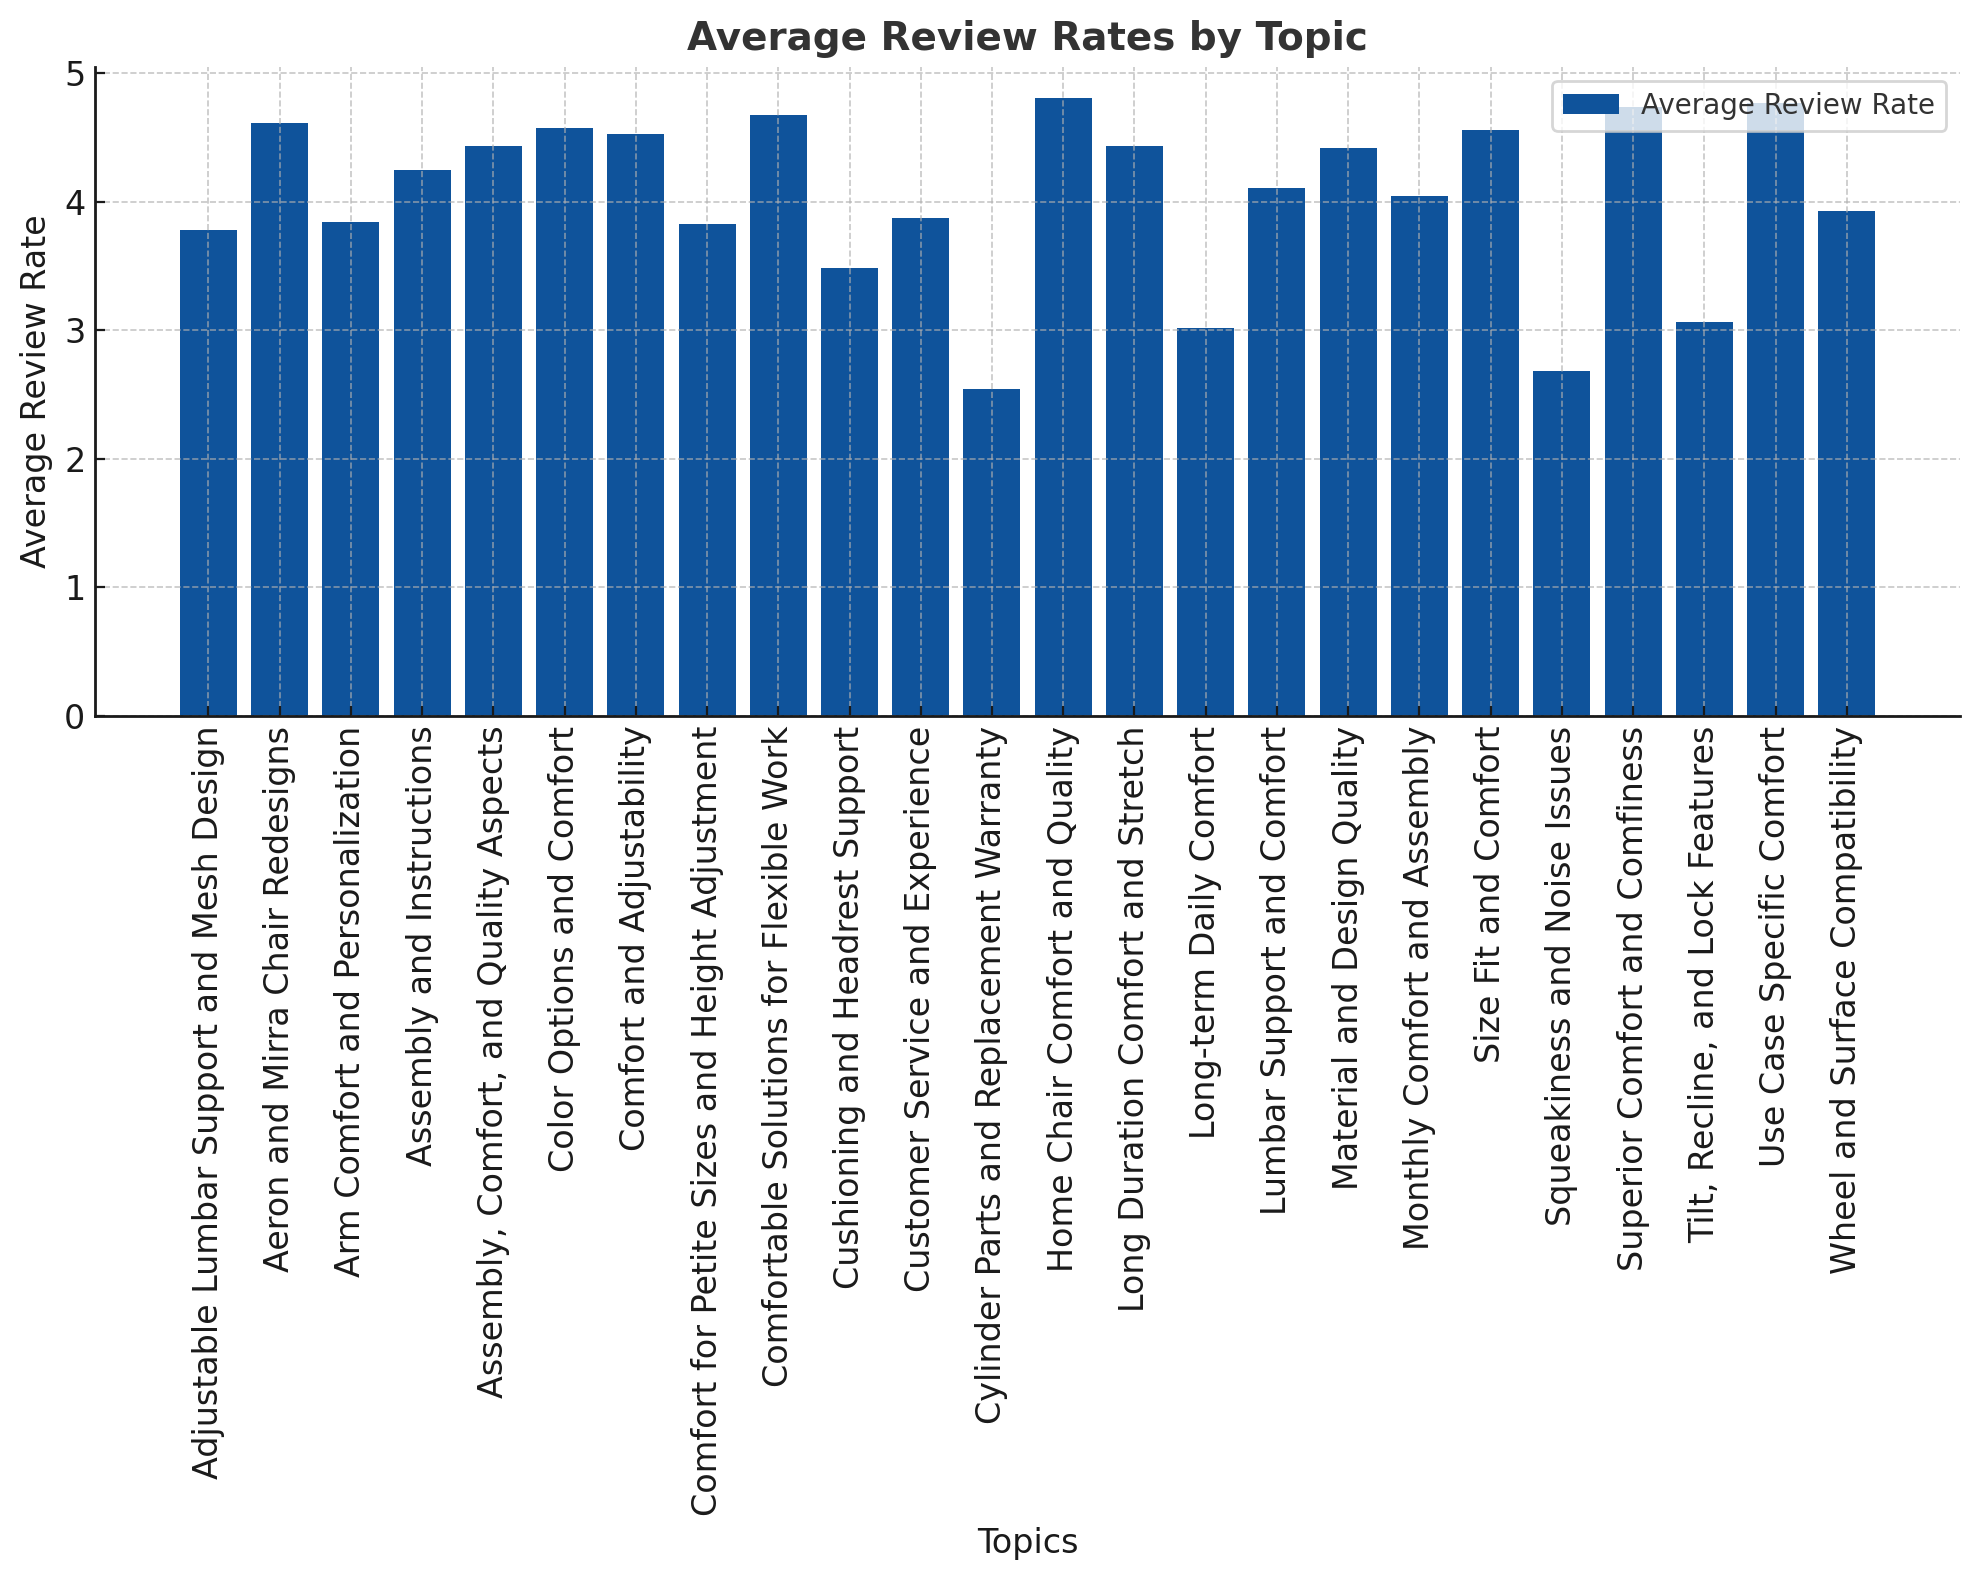

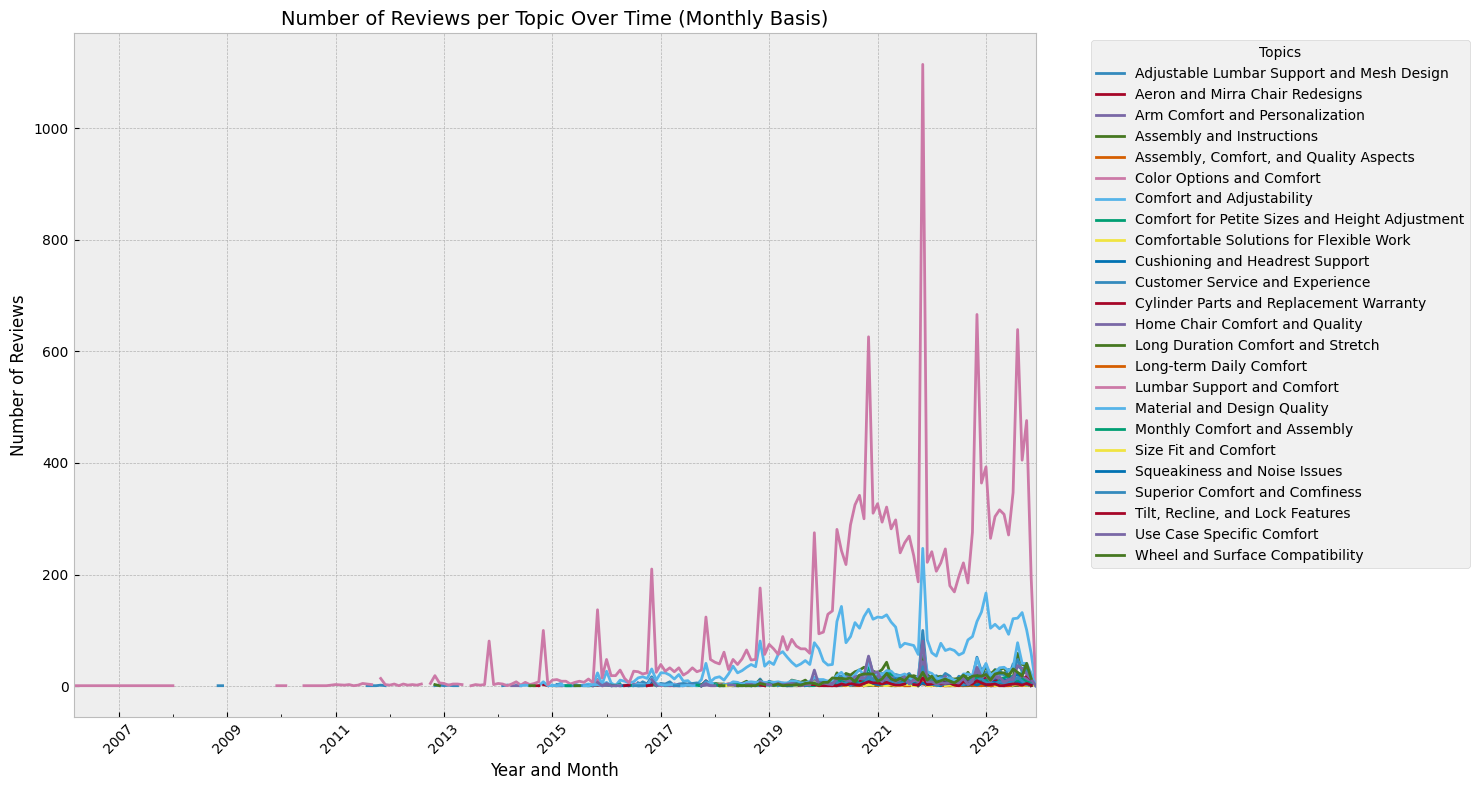

In [ ]:
merged_df['Review Date'] = pd.to_datetime(merged_df['Review Date'])

# Extract year and month
merged_df['YearMonth'] = merged_df['Review Date'].dt.to_period('M')

# Group by YearMonth and topic, then count the reviews
grouped_data = merged_df.groupby(['YearMonth', 'Merged_Topics']).size().reset_index(name='Review Count')

# Pivot the data for plotting
pivot_data = grouped_data.pivot(index='YearMonth', columns='Merged_Topics', values='Review Count')

# Plotting
plt.figure(figsize=(15, 8))
pivot_data.plot(kind='line', ax=plt.gca())
plt.title('Number of Reviews per Topic Over Time (Monthly Basis)', fontsize=14)
plt.xlabel('Year and Month', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Topics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Each colored area represents a different topic, with the x-axis showing the progression of time by month and year. The y-axis indicates the percentage each topic constitutes of the total reviews in each month. This visualization allows you to observe how the relative prominence of each topic changes over time.

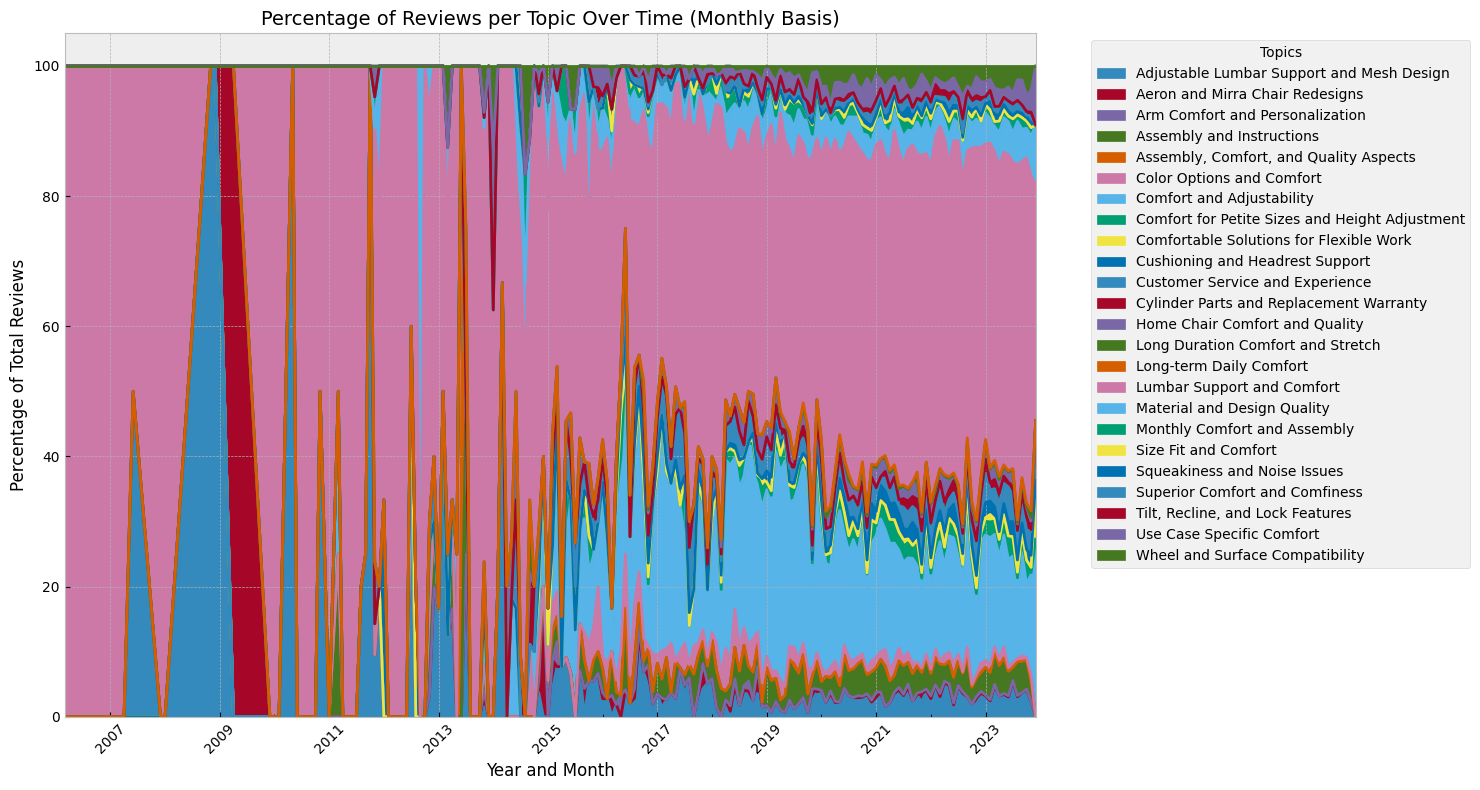

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the total reviews per month
total_reviews_per_month = merged_df.groupby('YearMonth').size()

# Merge the total reviews back into the grouped data
grouped_data = grouped_data.merge(total_reviews_per_month.rename('Total Monthly Reviews'), on='YearMonth')

# Calculate the percentage
grouped_data['Percentage'] = (grouped_data['Review Count'] / grouped_data['Total Monthly Reviews']) * 100

# Pivot the data for plotting
pivot_data = grouped_data.pivot(index='YearMonth', columns='Merged_Topics', values='Percentage')

# Plotting
plt.figure(figsize=(15, 8))
pivot_data.plot(kind='area', stacked=True, ax=plt.gca())
plt.title('Percentage of Reviews per Topic Over Time (Monthly Basis)', fontsize=14)
plt.xlabel('Year and Month', fontsize=12)
plt.ylabel('Percentage of Total Reviews', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Topics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
pivot_data

Merged_Topics  Adjustable Lumbar Support and Mesh Design  \
YearMonth                                                  
2006-03                                              NaN   
2007-04                                              NaN   
2007-06                                              NaN   
2007-12                                              NaN   
2008-01                                              NaN   
...                                                  ...   
2023-08                                         3.074295   
2023-09                                         3.721489   
2023-10                                         4.120267   
2023-11                                         2.374670   
2023-12                                              NaN   

Merged_Topics  Aeron and Mirra Chair Redesigns  \
YearMonth                                        
2006-03                                    NaN   
2007-04                                    NaN   
2007-06                                    NaN   
2007-12                                    NaN   
2008-01                                    NaN   
...                                        ...   
2023-08                                    NaN   
2023-09                                    NaN   
2023-10                                    NaN   
2023-11                                    NaN   
2023-12                                    NaN   

Merged_Topics  Arm Comfort and Personalization  Assembly and Instructions  \
YearMonth                                                                   
2006-03                                    NaN                        NaN   
2007-04                                    NaN                        NaN   
2007-06                                    NaN                        NaN   
2007-12                                    NaN                        NaN   
2008-01                                    NaN                        NaN   
...                                        ...                        ...   
2023-08                               0.170794                   5.038429   
2023-09                                    NaN                   4.681873   
2023-10                               0.111359                   4.231626   
2023-11                                    NaN                   2.902375   
2023-12                                    NaN                        NaN   

Merged_Topics  Assembly, Comfort, and Quality Aspects  \
YearMonth                                               
2006-03                                           NaN   
2007-04                                           NaN   
2007-06                                           NaN   
2007-12                                           NaN   
2008-01                                           NaN   
...                                               ...   
2023-08                                      0.170794   
2023-09                                      0.120048   
2023-10                                      0.222717   
2023-11                                           NaN   
2023-12                                           NaN   

Merged_Topics  Color Options and Comfort  Comfort and Adjustability  \
YearMonth                                                             
2006-03                              NaN                        NaN   
2007-04                              NaN                        NaN   
2007-06                              NaN                        NaN   
2007-12                              NaN                        NaN   
2008-01                              NaN                        NaN   
...                                  ...                        ...   
2023-08                         0.512383                  10.418446   
2023-09                         0.840336                  15.846339   
2023-10                         0.445434                  11.247216   
2023-11                         1.055409   

Trend Analysis:

Calculate moving averages or growth rates to identify trends.

In [ ]:
pivot_data_moving_avg = pivot_data.rolling(window=3).mean()  # 3-month moving average


In [ ]:
pivot_data_moving_avg.

Merged_Topics  Adjustable Lumbar Support and Mesh Design  \
YearMonth                                                  
2006-03                                              NaN   
2007-04                                              NaN   
2007-06                                              NaN   
2007-12                                              NaN   
2008-01                                              NaN   
...                                                  ...   
2023-08                                         3.729959   
2023-09                                         4.074397   
2023-10                                         3.638684   
2023-11                                         3.405475   
2023-12                                              NaN   

Merged_Topics  Aeron and Mirra Chair Redesigns  \
YearMonth                                        
2006-03                                    NaN   
2007-04                                    NaN   
2007-06                                    NaN   
2007-12                                    NaN   
2008-01                                    NaN   
...                                        ...   
2023-08                                    NaN   
2023-09                                    NaN   
2023-10                                    NaN   
2023-11                                    NaN   
2023-12                                    NaN   

Merged_Topics  Arm Comfort and Personalization  Assembly and Instructions  \
YearMonth                                                                   
2006-03                                    NaN                        NaN   
2007-04                                    NaN                        NaN   
2007-06                                    NaN                        NaN   
2007-12                                    NaN                        NaN   
2008-01                                    NaN                        NaN   
...                                        ...                        ...   
2023-08                               0.161897                   3.492908   
2023-09                                    NaN                   3.918527   
2023-10                                    NaN                   4.650642   
2023-11                                    NaN                   3.938624   
2023-12                                    NaN                        NaN   

Merged_Topics  Assembly, Comfort, and Quality Aspects  \
YearMonth                                               
2006-03                                           NaN   
2007-04                                           NaN   
2007-06                                           NaN   
2007-12                                           NaN   
2008-01                                           NaN   
...                                               ...   
2023-08                                           NaN   
2023-09                                           NaN   
2023-10                                      0.171186   
2023-11                                           NaN   
2023-12                                           NaN   

Merged_Topics  Color Options and Comfort  Comfort and Adjustability  \
YearMonth                                                             
2006-03                              NaN                        NaN   
2007-04                              NaN                        NaN   
2007-06                              NaN                        NaN   
2007-12                              NaN                        NaN   
2008-01                              NaN                        NaN   
...                                  ...                        ...   
2023-08                         0.576148                  14.501008   
2023-09                         0.677048                  14.227565   
2023-10                         0.599384                  12.504000   
2023-11                         0.780393   

Seasonality Analysis:

Look for repeating patterns over time.

In [ ]:
pivot_data['Month'] = pivot_data.index.month
monthly_seasonality = pivot_data.groupby('Month').mean()


In [ ]:
monthly_seasonality

Merged_Topics  Adjustable Lumbar Support and Mesh Design  \
Month                                                      
1                                               4.814726   
2                                               8.537777   
3                                              11.641568   
4                                               4.605017   
5                                              14.175014   
6                                               4.306355   
7                                               9.013539   
8                                               5.606292   
9                                               7.093724   
10                                             12.992408   
11                                             13.203371   
12                                             15.331096   

Merged_Topics  Aeron and Mirra Chair Redesigns  \
Month                                            
1                                     0.346420   
2                                     1.995142   
3                                     1.744548   
4                                     0.420168   
5                                          NaN   
6                                     0.358423   
7                                     1.612903   
8                                     0.163934   
9                                     4.347826   
10                                    1.022385   
11                                    1.922483   
12                                   10.208914   

Merged_Topics  Arm Comfort and Personalization  Assembly and Instructions  \
Month                                                                       
1                                     0.555386                   4.055384   
2                                     0.188324                   4.377956   
3                                     1.219527                   6.689435   
4                                     0.195951                   4.436571   
5                                     0.953834                   3.500276   
6                                     0.470577                   5.582711   
7                                     0.163628                   6.238203   
8                                     0.625012                   4.423590   
9                                     1.152340                   4.605196   
10                                    0.176811                   3.822303   
11                                    0.602449                   3.435550   
12                                    0.305082                   3.800715   

Merged_Topics  Assembly, Comfort, and Quality Aspects  \
Month                                                   
1                                            0.493095   
2                                                 NaN   
3                                            0.274811   
4                                            0.257371   
5                                            0.385223   
6                                           25.325999   
7                                            0.722896   
8                                            0.167364   
9                                            0.454043   
10                                           0.192515   
11                                           0.805245   
12                                           0.217901   

Merged_Topics  Color Options and Comfort  Comfort and Adjustability  \
Month                                                                 
1                               1.442128                  19.229802   
2                               2.655703                  20.233819   
3                               1.762862                  19.270893   
4                               3.120363                  21.946359   
5                               2.581805                  24.044467   
6                               3.106275                  20.453565   
7           

In [ ]:
pivot_data.to_csv('pivoted_review_data.csv')

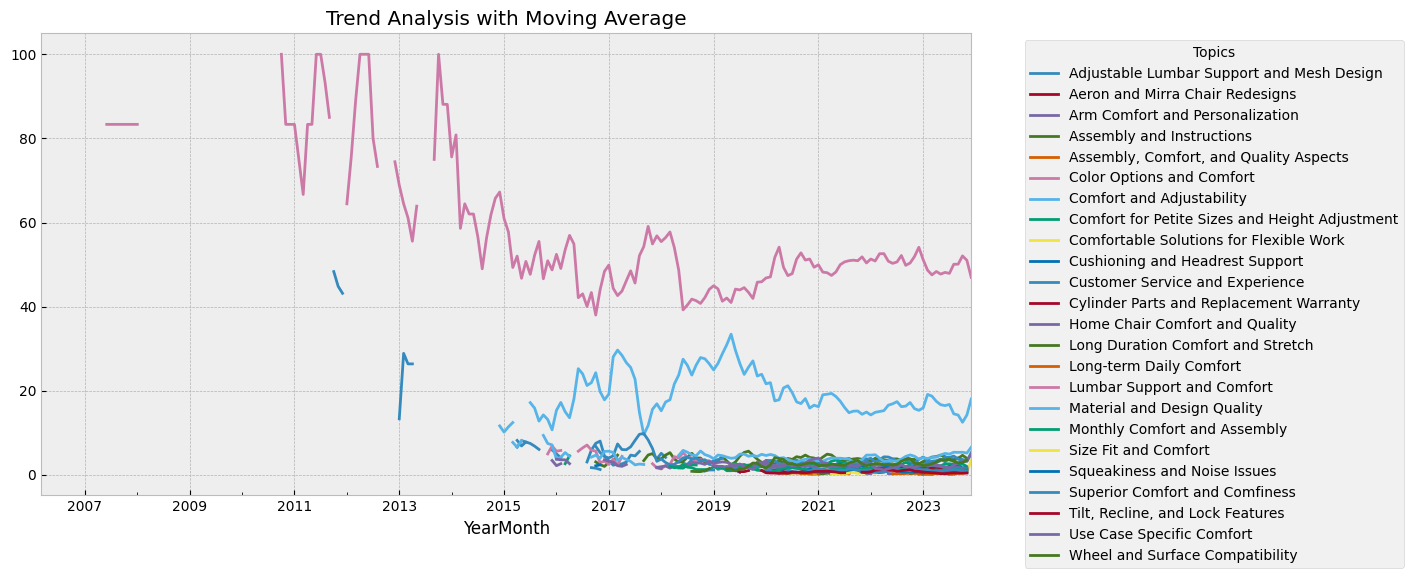

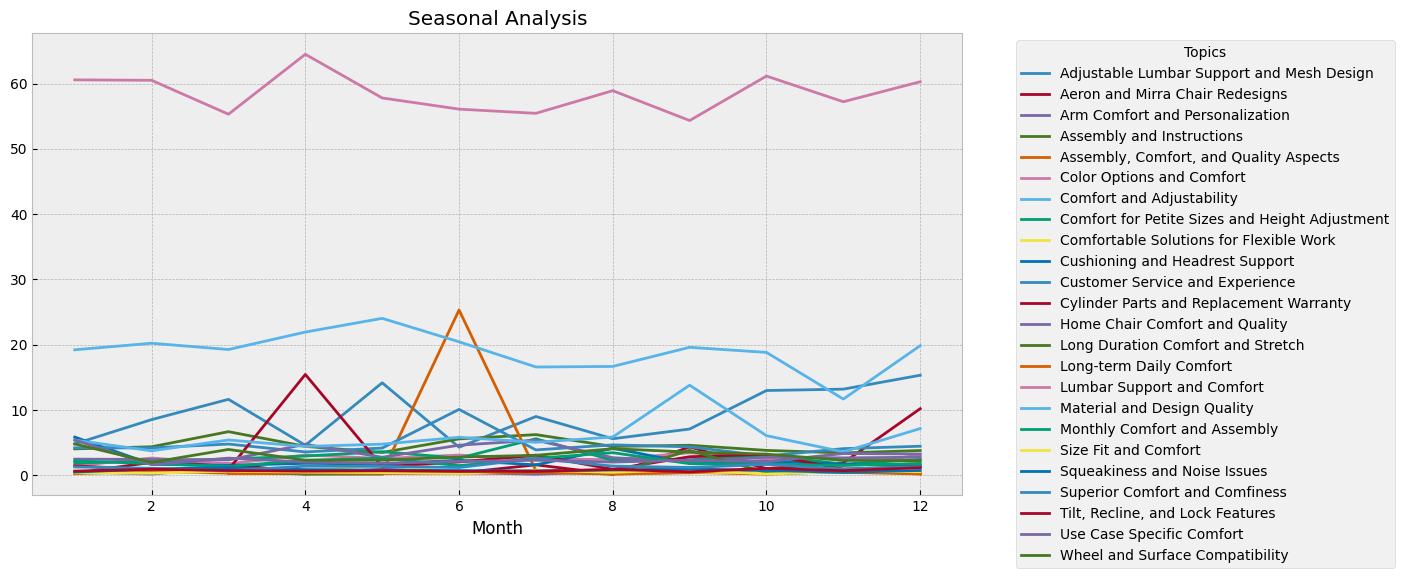

In [ ]:
import matplotlib.pyplot as plt

# Trend plot
pivot_data_moving_avg.plot(figsize=(12, 6))
plt.title('Trend Analysis with Moving Average')
plt.legend(title='Topics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Seasonality plot
monthly_seasonality.plot(figsize=(12, 6))
plt.title('Seasonal Analysis')
plt.legend(title='Topics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


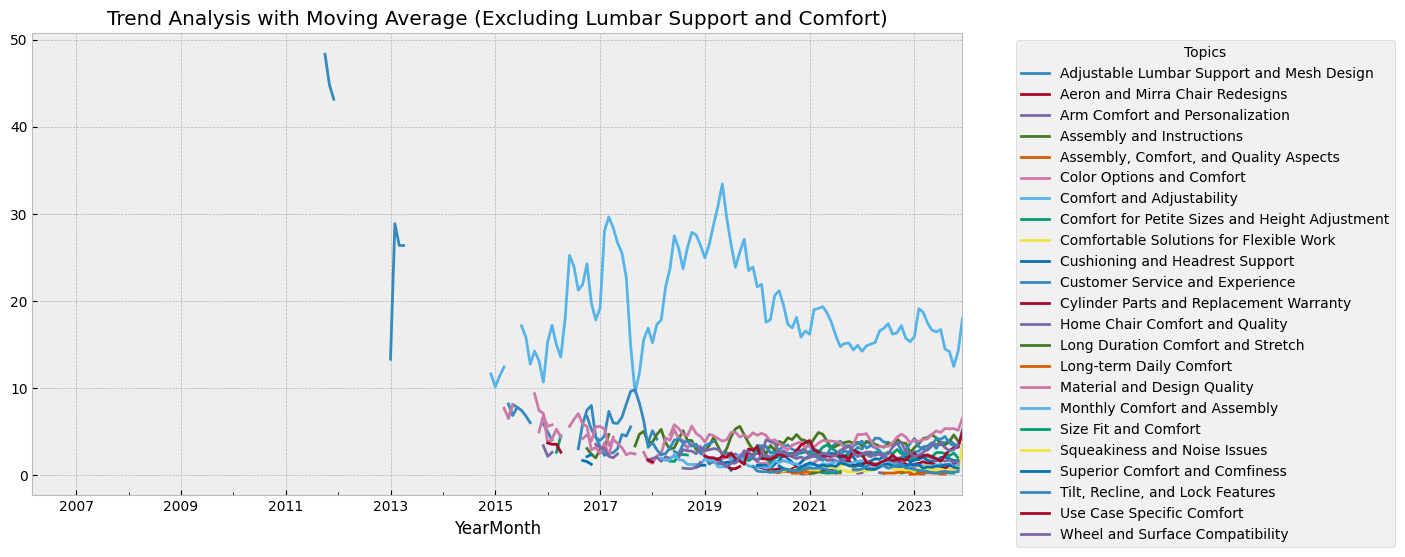

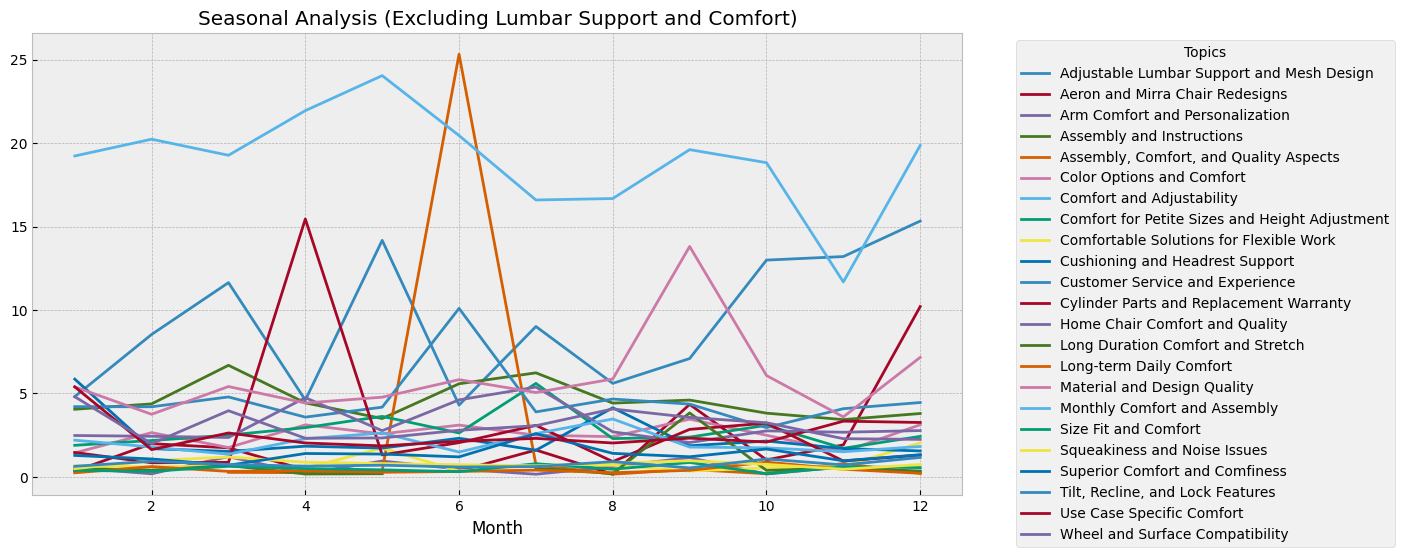

In [ ]:
#exclude outliner: Lumbar Support and Comfort
import matplotlib.pyplot as plt

# Drop "Lumbar Support and Comfort" from the DataFrames
pivot_data_moving_avg_excluded = pivot_data_moving_avg.drop('Lumbar Support and Comfort', axis=1)
monthly_seasonality_excluded = monthly_seasonality.drop('Lumbar Support and Comfort', axis=1)

# Trend plot without "Lumbar Support and Comfort"
pivot_data_moving_avg_excluded.plot(figsize=(12, 6))
plt.title('Trend Analysis with Moving Average (Excluding Lumbar Support and Comfort)')
plt.legend(title='Topics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Seasonality plot without "Lumbar Support and Comfort"
monthly_seasonality_excluded.plot(figsize=(12, 6))
plt.title('Seasonal Analysis (Excluding Lumbar Support and Comfort)')
plt.legend(title='Topics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Increasing Trend: topics where the moving average is consistently increasing over the latest months.

Decreasing Trend: Conversely, topics with a consistently decreasing moving average may be losing interest.

Continuous Zero Values: If a topic consistently has zero reviews over several months, the moving average might remain constant, and the difference (or change) over time could be computed as NaN

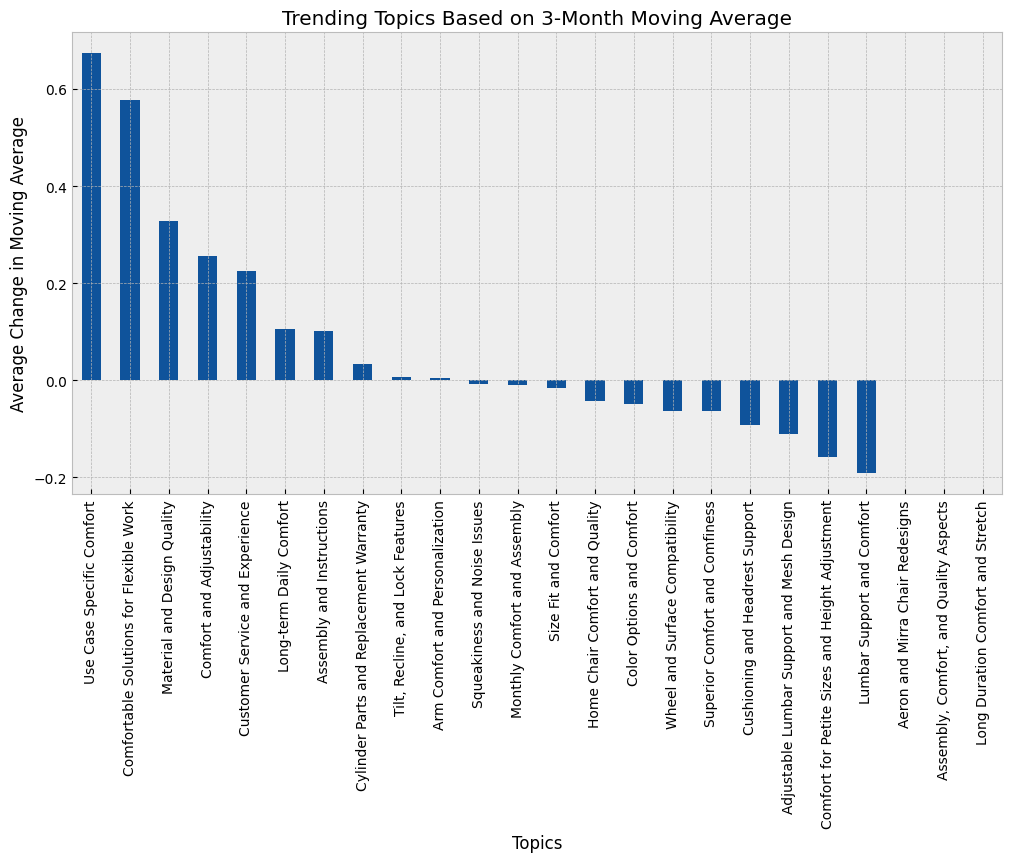

In [ ]:
import matplotlib.pyplot as plt

# Assuming pivot_data_moving_avg is your DataFrame with moving averages

# Calculate the difference in moving average over the latest periods (e.g., the last 6 months)
latest_period = pivot_data_moving_avg.tail(6)
trend_diff = latest_period.diff().mean()  # Average change over the period

# Sorting the topics by their trending value
trending_topics = trend_diff.sort_values(ascending=False)

# Plotting the trending topics
plt.figure(figsize=(12, 6))
trending_topics.plot(kind='bar', color='#0F539B')
plt.title('Trending Topics Based on 3-Month Moving Average')
plt.xlabel('Topics')
plt.ylabel('Average Change in Moving Average')
plt.show()


In [ ]:
trending_topics

Merged_Topics
Use Case Specific Comfort                         0.673338
Comfortable Solutions for Flexible Work           0.577727
Material and Design Quality                       0.328364
Comfort and Adjustability                         0.256131
Customer Service and Experience                   0.224012
Long-term Daily Comfort                           0.104533
Assembly and Instructions                         0.102281
Cylinder Parts and Replacement Warranty           0.033955
Tilt, Recline, and Lock Features                  0.007351
Arm Comfort and Personalization                   0.004929
Squeakiness and Noise Issues                     -0.007586
Monthly Comfort and Assembly                     -0.009745
Size Fit and Comfort                             -0.016218
Home Chair Comfort and Quality                   -0.042989
Color Options and Comfort                        -0.049246
Wheel and Surface Compatibility                  -0.062975
Superior Comfort and Comfiness            

"anomalies" refer to data points that significantly deviate from the majority of the data. They are often called outliers. These are unusual and unexpected observations in the data set which do not seem to fit with the characteristic distribution of the rest of the data.

using a standard deviation approach. This method assumes that data points that are more than two standard deviations away from the mean are anomalous. Here's what this means in simpler terms:

Standard Deviation is a measure of how spread out numbers are around the mean (average) value. A high standard deviation means that values are generally far from the mean, and a low standard deviation means that values are clustered close to the mean.

In [ ]:
# standard deviation
deviations = pivot_data.std()
anomalies = pivot_data[(pivot_data - pivot_data.mean()).abs() > 2 * deviations]


In [ ]:
anomalies

Merged_Topics  Adjustable Lumbar Support and Mesh Design  \
YearMonth                                                  
2006-03                                            False   
2007-04                                            False   
2007-06                                            False   
2007-12                                            False   
2008-01                                            False   
...                                                  ...   
2023-08                                            False   
2023-09                                            False   
2023-10                                            False   
2023-11                                            False   
2023-12                                            False   

Merged_Topics  Aeron and Mirra Chair Redesigns  \
YearMonth                                        
2006-03                                  False   
2007-04                                  False   
2007-06                                  False   
2007-12                                  False   
2008-01                                  False   
...                                        ...   
2023-08                                  False   
2023-09                                  False   
2023-10                                  False   
2023-11                                  False   
2023-12                                  False   

Merged_Topics  Arm Comfort and Personalization  Assembly and Instructions  \
YearMonth                                                                   
2006-03                                  False                      False   
2007-04                                  False                      False   
2007-06                                  False                      False   
2007-12                                  False                      False   
2008-01                                  False                      False   
...                                        ...                        ...   
2023-08                                  False                      False   
2023-09                                  False                      False   
2023-10                                  False                      False   
2023-11                                  False                      False   
2023-12                                  False                      False   

Merged_Topics  Assembly, Comfort, and Quality Aspects  \
YearMonth                                               
2006-03                                         False   
2007-04                                         False   
2007-06                                         False   
2007-12                                         False   
2008-01                                         False   
...                                               ...   
2023-08                                         False   
2023-09                                         False   
2023-10                                         False   
2023-11                                         False   
2023-12                                         False   

Merged_Topics  Color Options and Comfort  Comfort and Adjustability  \
YearMonth                                                             
2006-03                            False                      False   
2007-04                            False                      False   
2007-06                            False                      False   
2007-12                            False                      False   
2008-01                            False                      False   
...                                  ...                        ...   
2023-08                            False                      False   
2023-09                            False                      False   
2023-10                            False                      False   
2023-11                            False   

In [ ]:
# Summing the True values in each column and finding the column with the maximum sum
column_with_most_trues = anomalies.sum()

print(column_with_most_trues)


Merged_Topics
Adjustable Lumbar Support and Mesh Design          7
Aeron and Mirra Chair Redesigns                    1
Arm Comfort and Personalization                    2
Assembly and Instructions                          4
Assembly, Comfort, and Quality Aspects             1
Color Options and Comfort                          5
Comfort and Adjustability                          5
Comfort for Petite Sizes and Height Adjustment     3
Comfortable Solutions for Flexible Work            2
Cushioning and Headrest Support                    2
Customer Service and Experience                    2
Cylinder Parts and Replacement Warranty            1
Home Chair Comfort and Quality                     3
Long Duration Comfort and Stretch                  1
Long-term Daily Comfort                            3
Lumbar Support and Comfort                        24
Material and Design Quality                        1
Monthly Comfort and Assembly                       4
Size Fit and Comfort            

Herman Miller

In [ ]:
grouped = merged_df.groupby('Product').size()
sorted_grouped = grouped.sort_values(ascending=False)

# Select the top 5 items
top5 = sorted_grouped.head(10)

# Display the top 5 items
print(top5)

Product
hermanMillerAeron Chair                2183
HBADA Penguin-inspired Office Chair    2095
AK-EX-BK                               1096
secretlab TITAN evo                    1031
hermanMillerEmbody Chair                730
B0797HZ8W1                              684
HBADA E3 Ergonomic Chair Pro            593
B07L4ZH59Y                              580
B07Y8BXBX8                              572
hermanMillerSayl Chair                  521
dtype: int64


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35240 entries, 0 to 35239
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0.2                35240 non-null  int64         
 1   Unnamed: 0.1                35240 non-null  int64         
 2   Unnamed: 0_x                35240 non-null  int64         
 3   Review Date                 35240 non-null  datetime64[ns]
 4   rating                      5114 non-null   float64       
 5   Product                     21580 non-null  object        
 6   Review                      35239 non-null  object        
 7   country                     32117 non-null  object        
 8   Price                       19146 non-null  float64       
 9   pre_wordnet                 35190 non-null  object        
 10  rev_word_count              35240 non-null  int64         
 11  unique_word_count           35240 non-null  int64     

In [ ]:
# Filter the DataFrame for rows where 'Product' contains 'hermanMiller'
hermanMiller_filter = merged_df['Product'].str.contains('herman', case=False, na=False)

# Count the number of occurrences
hermanMiller_count = hermanMiller_filter.sum()

# Display the count
print(f"Total number of products containing 'herman': {hermanMiller_count}")


Total number of products containing 'herman': 4018


In [ ]:
hermanMiller_products = merged_df[merged_df['Product'].str.contains('herman', case=False, na=False)]
hermanMiller_products.to_csv('hermanMiller_products_products.csv', index=False)
merged_df.to_csv('merged_df.csv', index=False)

In [ ]:
hermanMiller_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4018 entries, 24010 to 28027
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Unnamed: 0.2                4018 non-null   int64         
 1   Unnamed: 0.1                4018 non-null   int64         
 2   Unnamed: 0_x                4018 non-null   int64         
 3   Review Date                 4018 non-null   datetime64[ns]
 4   rating                      4018 non-null   float64       
 5   Product                     4018 non-null   object        
 6   Review                      4018 non-null   object        
 7   country                     4018 non-null   object        
 8   Price                       4018 non-null   float64       
 9   pre_wordnet                 4018 non-null   object        
 10  rev_word_count              4018 non-null   int64         
 11  unique_word_count           4018 non-null   int64  

In [ ]:
df['Product'] = df['Product'].replace('NaN', pd.NA)
# If 'NaN' is an actual NaN value, you can directly use:
# df.dropna(subset=['Product'], inplace=True)

# Remove NA values
df.dropna(subset=['Product'], inplace=True)

# Count occurrences of each product
product_counts = df['Product'].value_counts()

# Identify top products
# Adjust the number in head() for the number of top products you want
top_products = product_counts.head(3)

print(top_products)

hermanMillerAeron Chair                2183
HBADA Penguin-inspired Office Chair    2095
AK-EX-BK                               1096
Name: Product, dtype: int64
